# Logistic Regression with Python

#### Importing the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

#### Loading the dataset

In [3]:
Data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")

In [4]:
Data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [16]:
yd = np.asarray(Data.loc[:,"churn"].astype("int"))
xd = np.asarray(Data.loc[:,['age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']])

In [19]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts( xd, yd, test_size = 0.3, random_state = 4)
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape, ytest.shape)

Train set: (140, 8) (140,)
Test set: (60, 8) (60,)


In [24]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
LinearRg = LR( C = 0.01, solver = "liblinear").fit(xtrain, ytrain)
yhat = LinearRg.predict(xtest)

In [23]:
yhat_prob = LinearRg.predict_proba(xtest)

array([[0.75424751, 0.24575249],
       [0.6409642 , 0.3590358 ],
       [0.65277274, 0.34722726],
       [0.78277324, 0.21722676],
       [0.62958112, 0.37041888],
       [0.7243064 , 0.2756936 ],
       [0.57116041, 0.42883959],
       [0.72838413, 0.27161587],
       [0.56015272, 0.43984728],
       [0.73062376, 0.26937624],
       [0.78168108, 0.21831892],
       [0.85920783, 0.14079217],
       [0.52618115, 0.47381885],
       [0.58550317, 0.41449683],
       [0.90274229, 0.09725771],
       [0.85012661, 0.14987339],
       [0.7051968 , 0.2948032 ],
       [0.49871925, 0.50128075],
       [0.58672662, 0.41327338],
       [0.59186729, 0.40813271],
       [0.75226218, 0.24773782],
       [0.6669536 , 0.3330464 ],
       [0.69516962, 0.30483038],
       [0.75028625, 0.24971375],
       [0.66859652, 0.33140348],
       [0.90935069, 0.09064931],
       [0.85137071, 0.14862929],
       [0.68307458, 0.31692542],
       [0.6057209 , 0.3942791 ],
       [0.87632445, 0.12367555],
       [0.

#  Model Evalution

#### Jaccard

In [25]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ytest,yhat )

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7166666666666667

#### Confusion Matrix

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest, yhat, labels=[1,0]))

[[ 1 16]
 [ 1 42]]


Confusion matrix, without normalization
[[ 1 16]
 [ 1 42]]


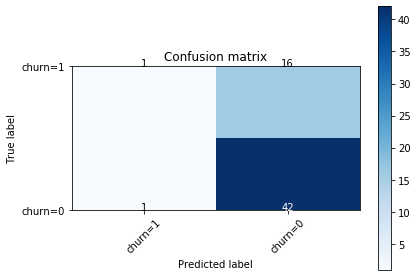

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [30]:
print (classification_report(ytest, yhat))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83        43
           1       0.50      0.06      0.11        17

    accuracy                           0.72        60
   macro avg       0.61      0.52      0.47        60
weighted avg       0.66      0.72      0.63        60



In [32]:
from sklearn.metrics import log_loss
log_loss(ytest, yhat_prob)

0.48361994153702953